In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr

### Basic data

In [1]:
lat_target=45.0
lon_target=360-117.0

In [2]:
pathname = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_huss_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc'

In [5]:
filehandle=Dataset(pathname,'r',format="NETCDF4")
lathandle=filehandle.variables['lat']
lonhandle=filehandle.variables['lon']
timehandle=filehandle.variables['time']
datahandle=filehandle.variables['specific_humidity']

In [6]:
time_num=365
timeindex=range(0,time_num,1)
time=timehandle[timeindex]
lat = lathandle[:]
lon = lonhandle[:]

In [7]:
#find indices of target lat/lon/day
lat_index = (np.abs(lat-lat_target)).argmin()
lon_index = (np.abs(lon-lon_target)).argmin()
#check final is in right bounds
if(lat[lat_index]>lat_target):
	if(lat_index!=0):
		lat_index = lat_index - 1
if(lat[lat_index]<lat_target):
	if(lat_index!=len(lat)):
		lat_index =lat_index +1
if(lon[lon_index]>lon_target):
	if(lon_index!=0):
		lon_index = lon_index - 1
if(lon[lon_index]<lon_target):
	if(lon_index!=len(lon)):
		lon_index = lon_index + 1
lat=lat[lat_index]
lon=lon[lon_index]

In [13]:
data = datahandle[timeindex,lat_index,lon_index]

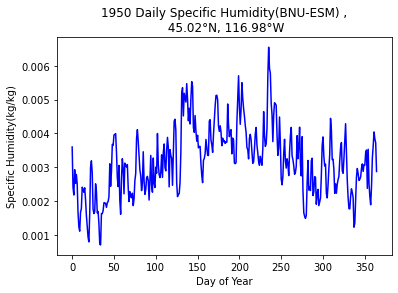

In [10]:
days = np.arange(0,len(time))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(u'Day of Year')
ax.set_ylabel(u'Specific Humidity(kg/kg)')
ax.set_title(u'1950 Daily Specific Humidity(BNU-ESM) ,\n %4.2f\u00b0N, %4.2f\u00b0W' % (lat, abs(360-lon)))
ax.ticklabel_format(style='plain')
ax.plot(days,data,'b-')
plt.savefig("myPythonGraph.png")
plt.show()

### Advanced data

In [ ]:
#This script extracts a time series of data from the MACAv2-METDATA dataset from 1950-2099 for a single model, 
#but is easily generalizable to all models, all variables by looping over the models/variables in VARNAME, MODELNAME and 
#over a set of point locations by looping over LAT_TARGETS
#=========================================================
#            MACAV2METDATA FILE PARAMETERS
#=========================================================
dirPath='http://thredds.northwestknowledge.net:8080/thredds/dodsC/'  
VARNAME =('tasmax','tasmin','rhsmax','rhsmin','pr','rsds','uas','vas','huss')
VARLONGNAME=('air_temperature','air_temperature', 'relative_humidity','relative_humidity',\
                'precipitation','surface_downwelling_shortwave_flux_in_air',\
                'eastward_wind','northward_wind','specific_humidity')
MODELNAME=('bcc-csm1-1','bcc-csm1-1-m','BNU-ESM','CanESM2','CCSM4','CNRM-CM5','CSIRO-Mk3-6-0',\
            'GFDL-ESM2G','GFDL-ESM2M','HadGEM2-CC365','HadGEM2-ES365',\
                'inmcm4','IPSL-CM5A-MR','IPSL-CM5A-LR','IPSL-CM5B-LR',\
                'MIROC5','MIROC-ESM','MIROC-ESM-CHEM','MRI-CGCM3','NorESM1-M')
SCENNAME =('historical','rcp45','rcp85') 
YEAR_START=('1950','2006','2006')
YEAR_END =('2005','2099','2099')
RUN_NUM=[1] * 20
RUN_NUM[4] = 6 #setting CCSM4 with run 6
DOMAIN='CONUS'

#lat/lon pairs for point locations
LAT_TARGETS=[46.7317]
LON_TARGETS=[116.9972]
#=========================================================

### Imported Data

In [19]:
# Fucntion for reading datasets
def read_file(file):
    df = pd.read_csv(file, sep=',',header=0, encoding='unicode_escape')
    return df

In [22]:
df_his_daily = read_file('MACA_41.9795 Latitude, -76.9813 Longitude_2006-2020.csv')

In [23]:
df_his_daily

,yyyy-mm-dd,Daily Minimum Near-Surface Air Temperature(K),Daily Maximum Near-Surface Air Temperature(K),Daily Mean Near-Surface Specific Humidity(kgkg-1),vpd(kPa),Precipitation(mm)
0,2006/1/1,283.398926,293.986755,0.009150,0.47,1.098970
1,2006/1/2,279.793610,291.428253,0.007570,0.39,1.960552
2,2006/1/3,275.975372,283.474060,0.003914,0.40,8.333006
3,2006/1/4,269.891174,278.239380,0.003576,0.13,8.629661
4,2006/1/5,264.457336,271.953064,0.001893,0.15,0.496073
...,...,...,...,...,...,...
5474,2020/12/27,260.293335,272.762451,0.001926,0.12,0.000000
5475,2020/12/28,267.226715,278.643707,0.002525,0.26,0.000000
5476,2020/12/29,269.869904,278.763855,0.002864,0.26,0.000000
5477,2020/12/30,270.549316,280.423584,0.003521,0.22,0.000000
